In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df["label"] = breast_cancer.target

<Axes: >

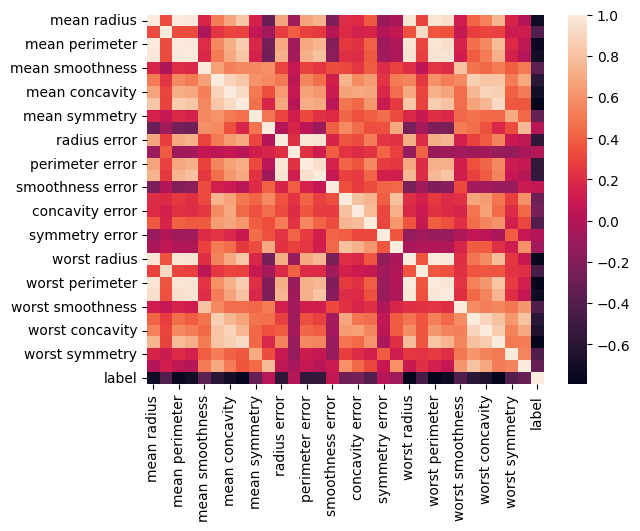

In [4]:
sns.heatmap(breast_cancer_df.corr(numeric_only=True))

In [5]:
breast_cancer_df.shape

(569, 31)

In [6]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
class AdalineGD(object):
  """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    cost_ : list
    Sum-of-squares cost function value in each epoch.
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit training data.
      Parameters
      ----------
      X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples
      is the number of examples and
      n_features is the number of features.
      y : array-like, shape = [n_examples]
      Target values.
      Returns
      -------
      self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

    self.cost_ = []

    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors ** 2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """Compute linear activation"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

class AdalineSGD(object):
  """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    shuffle : bool (default: True)
    Shuffles training data every epoch if True to prevent
    cycles.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    cost_ : list
    Sum-of-squares cost function value averaged over all
    training examples in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit training data.
      Parameters
      ----------
      X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of
      examples and n_features is the number of features.
      y : array-like, shape = [n_examples]
      Target values.
      Returns
      -------
      self : object
    """
    self._initialize_weights(X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []

      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self

  def _shuffle(self, X, y):
    """Shuffle training data"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self, m):
    """Initialize weights to small random numbers"""
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)

  def _update_weights(self, xi, target):
    """Apply Adaline learning rule to update the weights"""
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error ** 2
    return cost

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """Compute linear activation"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


class Perceptron(object):
  """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications (updates) in each epoch.
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data.
      Parameters
      ----------
      X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of
      examples and n_features is the number of features.
      y : array-like, shape = [n_examples]
      Target values.
      Returns
      -------
      self : object
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolors='black')

In [12]:
# y = breast_cancer_df.iloc[0:100, -1].values
# y = np.where(y == 'malignant', -1, 1)

# X = breast_cancer_df.iloc[0:100, [0, 2]].values

# plt.scatter(X[:50, 0], X[:50, 1], c="red", marker='o', label="malignant")
# plt.scatter(X[50:100, 0], X[50:100, 1], c="blue", marker='o', label="benign")
# plt.xlabel('mean radius')
# plt.ylabel('mean perimeter')
# plt.legend(loc="upper left")
# plt.show()


In [13]:
X = breast_cancer.data
y = breast_cancer.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

In [15]:
(train_data, val_data, train_labels, val_labels) = train_test_split(X_train, y_train,
test_size=0.1, random_state=84)

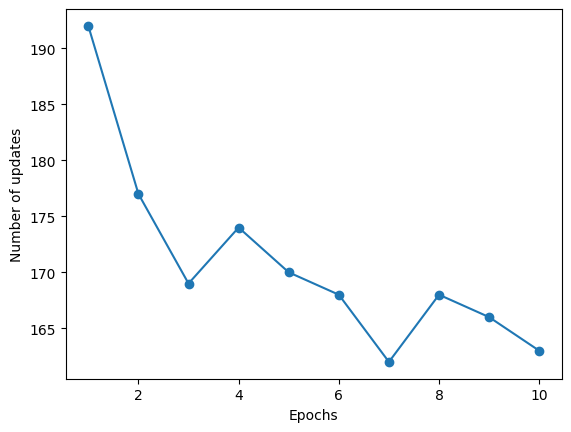

In [16]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [18]:
y_pred = ppn.predict(val_data)
accuracy_score(val_labels, y_pred)

0.675

In [24]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(X, y)

Perceptron(random_state=42)

In [20]:
clf.score(X, y)


0.9261862917398945

# AdalineGD

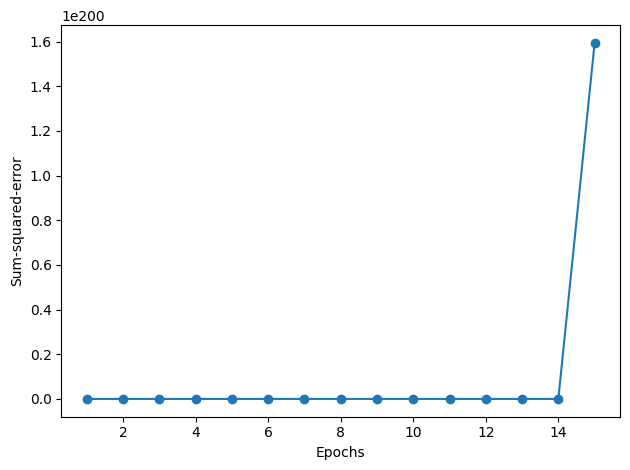

In [21]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X, y)

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker="o")
plt.xlabel('Epochs')
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()

In [22]:
y_pred = ada_gd.predict(val_data)
accuracy_score(val_labels, y_pred)

0.0

# Adaline SGD

<ipython-input-11-0b5a89d1b88d>:137: RuntimeWarning: overflow encountered in double_scalars
  cost = 0.5 * error ** 2
<ipython-input-11-0b5a89d1b88d>:135: RuntimeWarning: invalid value encountered in add
  self.w_[1:] += self.eta * xi.dot(error)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


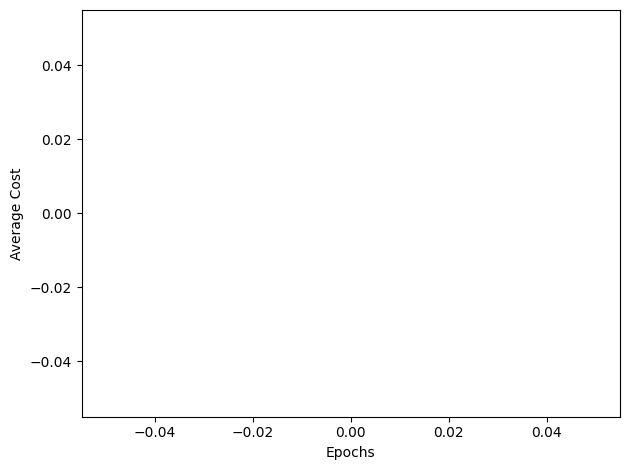

In [26]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=42)
ada_sgd.fit(X, y)
print(ada_sgd.cost_)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker="o")
plt.xlabel('Epochs')
plt.ylabel("Average Cost")
plt.tight_layout()
plt.show()